In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv('dataset.csv')  # make sure the filename matches what you uploaded
df.head()



Saving dataset.csv to dataset (1).csv


,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


In [ ]:
import pandas as pd
import re
from collections import Counter

df = pd.read_csv("dataset.csv")
df = df.dropna(subset=['job_description_text', 'seniority_level'])  # remove empty

# Combine job descriptions with seniority
df['clean_description'] = df['job_description_text'].apply(lambda x: x.lower())
# List of known tech skills (sample starter)
skills_list = [
    "python", "tensorflow", "pytorch", "machine learning", "deep learning",
    "sql", "hadoop", "spark", "kubernetes", "docker", "pandas", "scikit-learn",
    "nlp", "azure", "aws", "gcp", "data analysis", "data engineering", "llm", "diffusion models"
]

def extract_skills(text):
    found = []
    for skill in skills_list:
        if skill in text:
            found.append(skill)
    return found

df['skills'] = df['clean_description'].apply(extract_skills)
entry = df[df['seniority_level'].str.lower().str.contains("entry")]
mid_senior = df[df['seniority_level'].str.lower().str.contains("mid|senior")]

entry_skills = Counter([skill for sublist in entry['skills'] for skill in sublist])
mid_skills = Counter([skill for sublist in mid_senior['skills'] for skill in sublist])

# Display most common skills
print("Top Entry Level Skills:\n", entry_skills.most_common(10))
print("\nTop Mid-Senior Level Skills:\n", mid_skills.most_common(10))
all_skills = Counter([skill for sublist in df['skills'] for skill in sublist])
print("Top 3 Overall In-Demand Skills:", all_skills.most_common(3))
df['year'] = pd.to_datetime(df['job_posted_date']).dt.year
emerging_skills = ['llm', 'diffusion models']

df['emerging'] = df['clean_description'].apply(lambda text: any(skill in text for skill in emerging_skills))

emerging_trend = df.groupby('year')['emerging'].mean()
print("Trend of emerging skills by year:\n", emerging_trend)


Top Entry Level Skills:
 [('machine learning', 258), ('python', 233), ('aws', 171), ('pytorch', 143), ('tensorflow', 130), ('deep learning', 92), ('llm', 82), ('sql', 78), ('spark', 74), ('nlp', 63)]

Top Mid-Senior Level Skills:
 [('machine learning', 315), ('python', 295), ('pytorch', 186), ('aws', 172), ('tensorflow', 154), ('llm', 131), ('sql', 123), ('deep learning', 100), ('spark', 95), ('nlp', 82)]
Top 3 Overall In-Demand Skills: [('machine learning', 836), ('python', 746), ('aws', 489)]
Trend of emerging skills by year:
 year
2022    0.000000
2023    0.000000
2024    0.178082
2025    0.323465
Name: emerging, dtype: float64


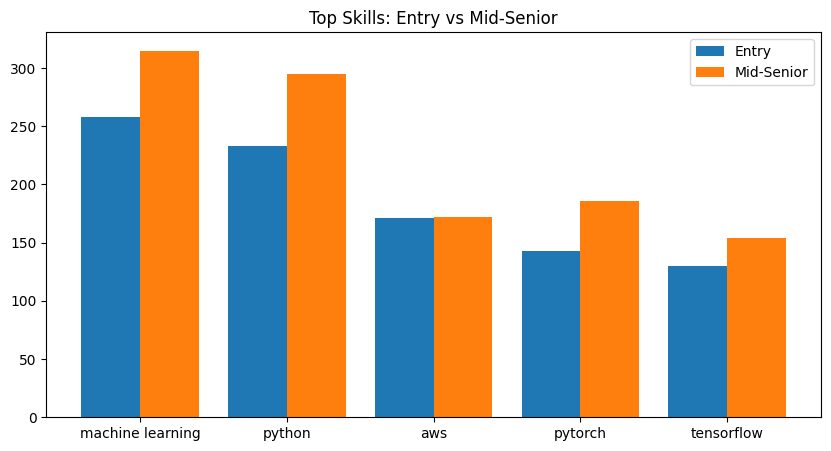

In [ ]:
import matplotlib.pyplot as plt

# Bar chart of top 5 skills (Entry vs Mid)
entry_top = dict(entry_skills.most_common(5))
mid_top = dict(mid_skills.most_common(5))

labels = list(entry_top.keys())
x = range(len(labels))
entry_vals = list(entry_top.values())
mid_vals = [mid_top.get(skill, 0) for skill in labels]

plt.figure(figsize=(10,5))
plt.bar(x, entry_vals, width=0.4, label='Entry', align='center')
plt.bar([i+0.4 for i in x], mid_vals, width=0.4, label='Mid-Senior', align='center')
plt.xticks([i+0.2 for i in x], labels)
plt.legend()
plt.title('Top Skills: Entry vs Mid-Senior')
plt.show()
